In [1]:
import os
from pathlib import Path
from PIL import Image

import pandas as pd
import numpy as np


CURRENT_DIRECTORY = Path.cwd()

def crop_image(idx,dataset="Train", show=False):
    image = Image.open(CURRENT_DIRECTORY.parent/ 'Datasets' / dataset /idx)
    if dataset =="Test":
        cropped_image = image.crop(df_test_ant[["x1","y1","x2","y2"]].loc[idx].to_list())
    else:
        cropped_image = image.crop(df_train_ant[["x1","y1","x2","y2"]].loc[idx].to_list())
    SHAPE = (20, 20)
    cropped_image = cropped_image.resize(SHAPE)
    if show:
        return cropped_image
    return np.array(cropped_image)

In [2]:
df_train_ant = pd.read_csv(CURRENT_DIRECTORY.parent / 'Datasets' / "TsignRecgTrain4170Annotation.txt",
                            header=None,
                            names=["file_name","width","height","x1","y1","x2","y2","category","none"],
                            sep=';')
df_train_ant.drop(columns="none",inplace=True)
# 5 most common categories
top_categories = df_train_ant["category"].value_counts()[2:7].index
df_train_ant = df_train_ant.loc[df_train_ant["category"].isin(top_categories)].reset_index(drop=True).copy()
df_train_ant = df_train_ant.sort_values(by=["category","file_name"],ignore_index=True)
df_train_ant= df_train_ant.set_index("file_name")

train_pca = []
for idx in df_train_ant.index:
    image = crop_image(idx)
    train_pca.append(image.ravel())

df_train = pd.DataFrame(train_pca, index=df_train_ant.index)

In [3]:
df_test_ant = pd.read_csv(CURRENT_DIRECTORY.parent / 'Datasets' / "TsignRecgTest1994Annotation.txt",
                            header=None,
                            names=["file_name","width","height","x1","y1","x2","y2","category","none"],
                            sep=';')
df_test_ant.drop(columns="none",inplace=True)
# 5 most common categories
#top_categories = df_test_ant["category"].value_counts()[:5].index
df_test_ant = df_test_ant.loc[df_test_ant["category"].isin(top_categories)].reset_index(drop=True).copy()
df_test_ant = df_test_ant.sort_values(by=["category","file_name"],ignore_index=True)
df_test_ant= df_test_ant.set_index("file_name")

test_pca = []
for idx in df_test_ant.index:
    image = crop_image(idx,dataset="Test")
    test_pca.append(image.ravel())

df_test = pd.DataFrame(test_pca, index=df_test_ant.index)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_train = pca.fit_transform(df_train)
X_test = pca.transform(df_test)

y_train = df_train_ant["category"]
y_test = df_test_ant["category"]

Text(0, 0.5, 'Explained variance')

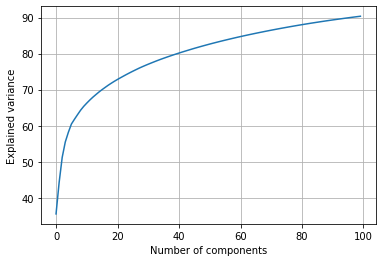

In [5]:
import matplotlib.pyplot as plt


pca = PCA(n_components=100)

pca.fit(df_train)

plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

### Sklearn

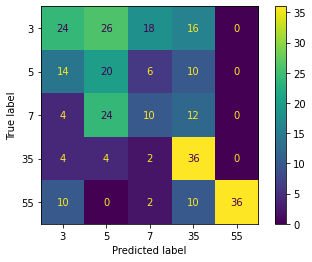

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
cm=confusion_matrix(y_test,y_pred,labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gnb.classes_)
disp.plot()

### Self implemented GaussianNB



c:\Users\StasiukW\OneDrive - FUJITSU\Documents\Studia\Archive\ITO\Git\nb\naive_bayes.py:54: RuntimeWarning: divide by zero encountered in log
  return np.log(coeff * exponent)


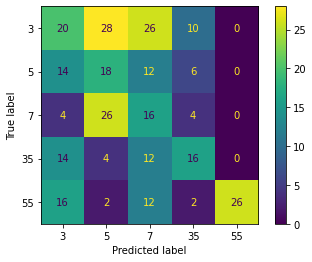

In [8]:
from nb.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
cm=confusion_matrix(y_test,y_pred,labels=gnb.classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gnb.classes)
disp.plot()

### Self implemented MultinomialNB


In [10]:
from sklearn.metrics import f1_score, accuracy_score

from nb.naive_bayes import MultinomialNB

f_micro = []
f_macro = []
accuracy = []
for i in range(1,100):
    mnb = MultinomialNB(bins=i)
    y_pred_mnb = mnb.fit(X_train, y_train).predict(X_test)
    f_micro.append(f1_score(y_test, y_pred_mnb, average='micro'))
    f_macro.append(f1_score(y_test, y_pred_mnb, average='macro'))
    accuracy.append(accuracy_score(y_test,y_pred_mnb))

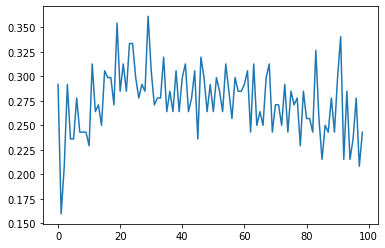

In [11]:
plt.plot(f_micro)

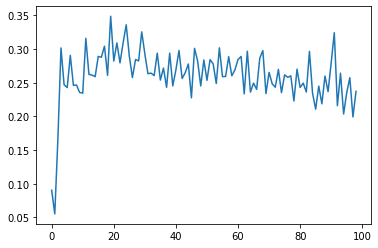

In [12]:
plt.plot(f_macro)

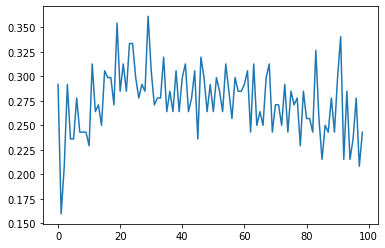

In [13]:
plt.plot(accuracy)

In [34]:
f_macro.index(max(f_macro))

19

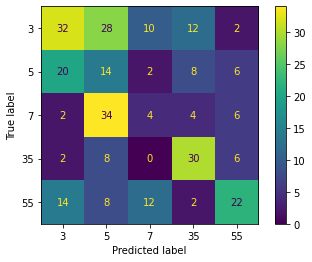

In [15]:
from nb.naive_bayes import MultinomialNB

mnb = MultinomialNB(bins=20)
y_pred_mnb = mnb.fit(X_train, y_train).predict(X_test)
cm=confusion_matrix(y_test,y_pred_mnb,labels=gnb.classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gnb.classes)
disp.plot()